<a href="https://colab.research.google.com/github/bakphoom/Python/blob/main/Final_Exam_Gunnar_Erickson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline 

pd.set_option('display.max_columns', None)

In [ ]:
def model(X=True, Y=True):

  reg_model = sm.GLS(Y, X).fit()
  #X = sm.add_constant(X,  has_constant='add')  This method did not work for me
  Yhat = reg_model.predict(X) #This method can make predictions but we don't need them in this example
  print(reg_model.summary())
  plt.figure()
  ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
  sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
  plt.legend()
  plt.show()
  plt.close()
  print('log(MSE)=' + str(math.log(mean_squared_error(Yhat,Y)))) # log transform MSE to make the large numbers easier to read.  Log preserves ordinality of data - it is an "affine transformation"
  return

def create_dummy(Categorical=True, dataframe=True):
  dataframe=pd.get_dummies(dataframe[Categorical]).join(dataframe)
  return dataframe

def interact(D=True, X=True, dataframe=True):
  for j in D:
    for k in X:
      dataframe[j+'_'+k]=dataframe[j]*dataframe[k]
  return dataframe


## Load Data into Colab

In [ ]:
df_house=create_dummy(Categorical='YrSold', dataframe=df_house)

In [ ]:
house_data_path='https://raw.githubusercontent.com/data-doctors/kaggle-house-prices-advanced-regression-techniques/master/data/train.csv'
df_house=pd.read_csv(house_data_path) # invoke Pandas and use read_csv() method passing in the parameter of the csv location, in this case a url address
df_house.head(1) # Visually Inspect that it loaded correctly
#df_house.info() # info() is prefered to .dtypes method because info() gives null counts and dtypes and does not cut the output shortd

# feature engineering age
df_house['age']=df_house['YrSold']-df_house['YearBuilt'] # Age of house when sold
df_house['SF']=df_house['1stFlrSF']+df_house['2ndFlrSF'] # Total Square Feet
df_house['baths']=df_house['FullBath']+df_house['HalfBath'] # Total Number of Bathrooms
df_house['constant']=1 # add a constant for later use in the regressions

df_house = create_dummy(Categorical='SaleCondition', dataframe=df_house)

df_house = create_dummy(Categorical='RoofStyle', dataframe=df_house)
df_house = create_dummy(Categorical='Neighborhood', dataframe=df_house)

df_house = interact(D=['Abnorml'], X=['SF'], dataframe=df_house)
df_house = interact(D=['Abnorml'], X=['age'], dataframe=df_house)

df_house['YrSold']=df_house['YrSold'].astype(str) # YrSold as string so that we can transform it into a dummy variable

# Need to transform the numeric MoSold into meaningful strings I do this in two parts
def month(X): # first define a function 'month()' 
  if X==1:
    return 'Jan'
  elif X==2:
    return 'Feb'
  elif X==3:
    return 'Mar'
  elif X==4:
    return 'Apr'
  elif X==5:
    return 'May'
  elif X==6:
    return 'Jun'
  elif X==7:
    return 'Jul'
  elif X==8:
    return 'Aug'
  elif X==9:
    return 'Sep'
  elif X==10:
    return 'Oct'
  elif X==11:
    return 'Nov'
  else:
    return 'Dec'

# second: apply the month() function to 'MoSold' column using the method 'apply(lambda x: function(x))' method
df_house['MoSold'] = df_house['MoSold'].apply(lambda x: month(x))

# take a look at the transformed data df_house['MoSold'].head()

# Descriptive Statistics
Answer the following questions.  To receive credit, you need to show your code and write a short answer.  A single question should be associated with only one code block.  

## Example Question and Answer:
Which neighborhood has the highest average sales price?

### Example Answer: 
NoRidge has the highest average price of $335,295.  See Code-block below for support

In [ ]:
Neighborhood_list = df_house['Neighborhood'].unique()

for i in Neighborhood_list:
  print( i + '   average price = ' + str(df_house.loc[df_house['Neighborhood']==i]['SalePrice'].mean()))

CollgCr   average price = 197965.77333333335
Veenker   average price = 238772.72727272726
Crawfor   average price = 210624.72549019608
NoRidge   average price = 335295.31707317074
Mitchel   average price = 156270.1224489796
Somerst   average price = 225379.83720930232
NWAmes   average price = 189050.0684931507
OldTown   average price = 128225.30088495575
BrkSide   average price = 124834.05172413793
Sawyer   average price = 136793.13513513515
NridgHt   average price = 316270.6233766234
NAmes   average price = 145847.08
SawyerW   average price = 186555.7966101695
IDOTRR   average price = 100123.78378378379
MeadowV   average price = 98576.4705882353
Edwards   average price = 128219.7
Timber   average price = 242247.44736842104
Gilbert   average price = 192854.50632911394
StoneBr   average price = 310499.0
ClearCr   average price = 212565.42857142858
NPkVill   average price = 142694.44444444444
Blmngtn   average price = 194870.88235294117
BrDale   average price = 104493.75
SWISU   average 

## Question 1:  
Which month are the most houses sold? 

Answer: Out of all the months, June yields the most houses sold at 253 houses. See Code-block below.

In [22]:
df_house['MoSold'].value_counts()

Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64

## Question 2: 
Which year are the most houses sold?

Answer: Out of all other years, 2009 has the most houses sold at 338 houses.

In [ ]:
df_house['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

## Question 3
In which neighborhood are prices most dispersed or spread out?

Answer: According to the standard deviation of 'Neighborhood', NoRidge is the most dispersed and spread out as it has the highest standard deviation. see code-block for supporting results. 

In [31]:
Neighborhood_list = df_house['Neighborhood'].unique()

for i in Neighborhood_list:
  print( i + '  standard deviation = ' + str(df_house.loc[df_house['Neighborhood']==i]['SalePrice'].std()))

CollgCr  standard deviation = 51403.66643820808
Veenker  standard deviation = 72369.31795877437
Crawfor  standard deviation = 68866.39547212512
NoRidge  standard deviation = 121412.65864036564
Mitchel  standard deviation = 36486.625333602635
Somerst  standard deviation = 56177.555888212046
NWAmes  standard deviation = 37172.21810645118
OldTown  standard deviation = 52650.58318492048
BrkSide  standard deviation = 40348.689270401126
Sawyer  standard deviation = 22345.129156542913
NridgHt  standard deviation = 96392.54495442321
NAmes  standard deviation = 33075.34545026379
SawyerW  standard deviation = 55651.99781951001
IDOTRR  standard deviation = 33376.71011693228
MeadowV  standard deviation = 23491.049609685513
Edwards  standard deviation = 43208.61645867323
Timber  standard deviation = 64845.651549263544
Gilbert  standard deviation = 35986.779085100556
StoneBr  standard deviation = 112969.67664045958
ClearCr  standard deviation = 50231.53899282105
NPkVill  standard deviation = 9377.31

## Question 4
Which year has the lowest average sales price?  Which year has the highest?

Answer: 2008 has the lowest average sales price. See Code-Block below for support 

In [ ]:
year_sold = df_house['YrSold'].unique()

for i in year_sold:
  print( i + '   average price = ' + str(df_house.loc[df_house['YrSold']==i]['SalePrice'].mean()))

2008   average price = 177360.83881578947
2007   average price = 186063.1519756839
2006   average price = 182549.4585987261
2009   average price = 179432.10355029587
2010   average price = 177393.67428571428


# Predictive Modeling





## Question 5: 
Evaluate which model makes the most accurate in-sample predictions (Model 1, 2 or 3). Support your answers with an appropriate metric.   

**Read the model definitions and variable definitions CAREFULLY to make sure your equation matches the model** and to avoid a misspecification.  You might need to define your own variables at times.  Some work has already been done in the beginning of this workbook but not all of it.  Attention to detail or lack thereof will matter here. 


Answer: Model 3 is  the most accurate predictor. With a MSE of 21.08 being the lowest out of the three, meaning it holds the lowest average of the squares of the error. I also has the highest R-squared value which means it has a 77.3% accuracy for prediction.

##Variable Definitions

$WoodDeckSF$ is a continuous variable for Square Footage of Wood Deck on the house. 

$SF$ is total square feet of house 

$Age$ is defined as Year Sold minus Year Built 

$Abnorml$ is a dummy equal to one if df_house['SaleCondition']=='Abnorml' and zero otherwise  

$Neigh_i$ is a dummy variable for the $i^{th}$ type of Neighborhood.  I ommitted several neighborhoods and note that my summation goes from 6 to 25 so that the subscripts numbering on my $\beta$'s match with the numbering in the equation.  Refer to the "Base Model" to see which neighborhoods are contained in this set.  

$Year_{2006}$ is a dummy equal to one if the house was sold in 2006.  Other year dummies are defined in the same way according to the subscript in the equation.  

$Month_k$ is a dummy for month sold, with the omitted category being January.

$Baths$ is the number of bathrooms the house has

$Hip$ is a dummy equal to one if the house has a hip roof and zero otherwise

$Updated$ is equal to 'YearSold' minus 'YearRemodAdd'

## Model 1
$SalePrice = \beta_0 + \beta_1 WoodDeckSF + \beta_2 SF + \beta_3 Age + \beta_4 Abnorml + \beta_5 (Abnorml \times SF) + \Sigma_{i=6}^{i=25}\beta_i Neigh_i + \beta_{26} Baths + \epsilon$



                            GLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            GLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     174.4
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:45:02   Log-Likelihood:                -17503.
No. Observations:                1460   AIC:                         3.506e+04
Df Residuals:                    1433   BIC:                         3.520e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    8.732e+04   6876.899     12.698      0.0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


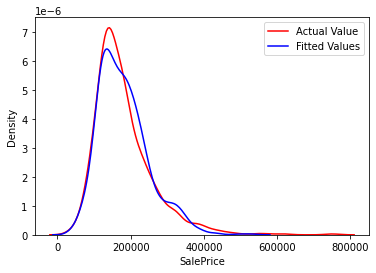

log(MSE)=21.138391062295902


In [ ]:
model(X=df_house[['constant','WoodDeckSF','SF','age', 'Abnorml', 'Abnorml_SF','CollgCr', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'SWISU','baths']], Y=df_house['SalePrice'])

## Model 2
$SalePrice = \beta_0 + \beta_1 WoodDeckSF + \beta_2 SF + \beta_3 Age + \beta_4 Abnorml + \beta_5 (Abnorml \times SF) + \Sigma_{i=6}^{i=25}\beta_i Neigh_i +\beta_{26} Year_{2006} + \beta_{27} Year_{2007}  + \beta_{28} Year_{2008} +  + \beta_{29} Year_{2009} + \Sigma_{k=30}^{k=41}\beta_k Month_k + \beta_{41} Baths + \epsilon$ *italicized text*



In [50]:
df_house['MoSold'].value_counts()

Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64

In [43]:
df_house=pd.get_dummies(df_house['MoSold']).join(df_house)

                            GLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            GLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     110.3
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:23:39   Log-Likelihood:                -17498.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1418   BIC:                         3.530e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     8.55e+04   8016.778     10.665      0.0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


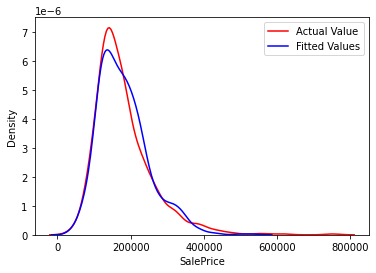

log(MSE)=21.13222360868824


In [51]:
model(X=df_house[['constant','WoodDeckSF','SF','age', 'Abnorml', 'Abnorml_SF','CollgCr', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'SWISU','2006','2007','2008','2009','Jan','Feb','Mar','Apr','May','Jul','Aug','Sep','Oct','Nov','Dec','baths']], Y=df_house['SalePrice'])

## Model 3
$SalePrice = \beta_0 + \beta_1 WoodDeckSF + \beta_2 SF + \beta_3 Age + \beta_4 Abnorml + \beta_5 Updated  + \Sigma_{i=6}^{i=25}\beta_i Neigh_i + + \beta_{26} Year_{2006} + \beta_{27} Year_{2007}  + \beta_{28} Year_{2008} +  + \beta_{29} Year_{2009} + \Sigma_{k=30}^{k=41}\beta_k Month_k + \beta_{41} Baths + \beta_{43} Hip + \epsilon$

In [ ]:
df_house['Updated2006']=df_house['2006']-df_house['YearRemodAdd']
df_house['Updated2007']=df_house['2007']-df_house['YearRemodAdd']
df_house['Updated2008']=df_house['2008']-df_house['YearRemodAdd']
df_house['Updated2009']=df_house['2009']-df_house['YearRemodAdd']

In [ ]:
df_house['MoSold'].value_counts()

Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64

                            GLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            GLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:24:13   Log-Likelihood:                -17463.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1418   BIC:                         3.523e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
constant    -7.895e+05   1.32e+05     -5.982      

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


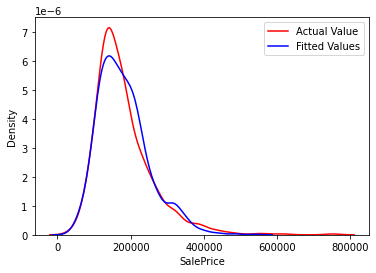

log(MSE)=21.083862928078073


In [52]:
model(X=df_house[['constant','WoodDeckSF','SF','age', 'Abnorml','CollgCr','Updated2006','Updated2007','Updated2008','Updated2009','Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'SWISU','Jan','Feb','Mar','Apr','May','Jul','Aug','Sep','Oct','Nov','Dec','baths','Hip']], Y=df_house['SalePrice'])